In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from pydataset import data

In [4]:
swiss = data('swiss')

In [5]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [6]:
swiss.dtypes

Fertility           float64
Agriculture         float64
Examination           int64
Education             int64
Catholic            float64
Infant.Mortality    float64
dtype: object

In [7]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


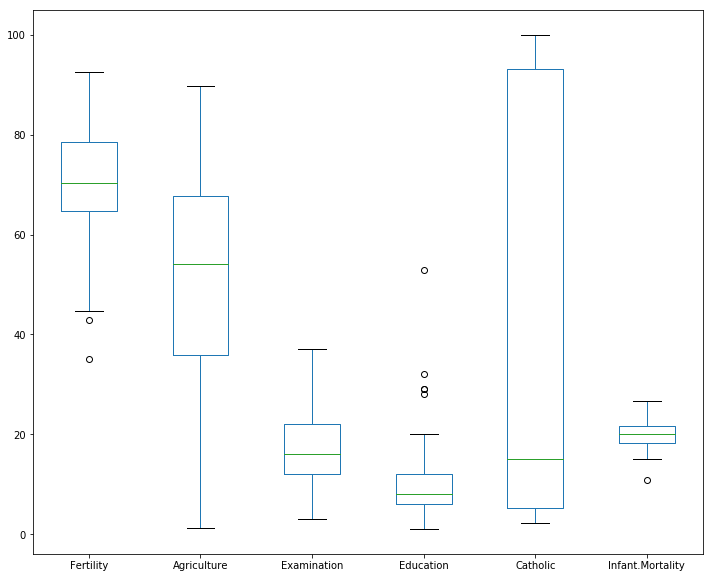

In [13]:
swiss.plot.box(figsize=(12, 10))

In [16]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [40]:
train, test = train_test_split(swiss, train_size=.75, random_state=123)

/Users/zach/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
X = swiss.drop(columns='Fertility')
y = swiss.Fertility

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75)

In [42]:
lm1 = LinearRegression()
lm1.fit(train[['Agriculture', 'Catholic']], train.Fertility)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
mse = mean_squared_error(train.Fertility, lm1.predict(train[['Agriculture', 'Catholic']]))
r2 = r2_score(train.Fertility, lm1.predict(train[['Agriculture', 'Catholic']]))

print(f'mse: {mse}, r^2: {r2}')

mse: 107.9829772746781, r^2: 0.20571412056121652


In [45]:
lm2 = LinearRegression()
lm2.fit(train[['Education', 'Examination']], train.Fertility)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
mse = mean_squared_error(train.Fertility, lm2.predict(train[['Education', 'Examination']]))
r2 = r2_score(train.Fertility, lm2.predict(train[['Education', 'Examination']]))

print(f'mse: {mse}, r^2: {r2}')

mse: 84.5971414820288, r^2: 0.37773233692994834


In [47]:
predicted = lm2.predict(test[['Education', 'Examination']])
actual = test.Fertility

In [48]:
mean_squared_error(actual, predicted), r2_score(actual, predicted)

(51.20932006225985, 0.7446902519892097)

In [49]:
lm = LinearRegression().fit(train.drop(columns='Fertility'), train.Fertility)

predicted = lm.predict(train.drop(columns='Fertility'))
actual = train.Fertility

mean_squared_error(actual, predicted)

45.69364052737513

In [50]:
list(zip(train.drop(columns='Fertility').columns, lm.coef_))

[('Agriculture', -0.2135215878064973),
 ('Examination', -0.3970413392464384),
 ('Education', -0.9191434875467087),
 ('Catholic', 0.11924830687492441),
 ('Infant.Mortality', 1.661910462058106)]

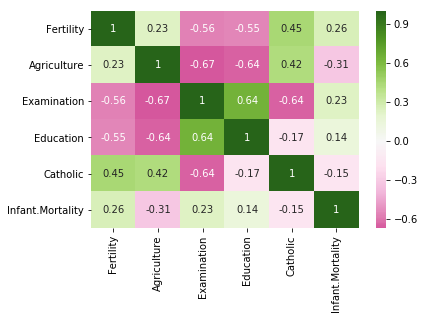

In [52]:
sns.heatmap(train.corr(), cmap='PiYG', center=0, annot=True)

In [53]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer